In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [2]:
def smooth(values, window_size):

    """ Glättet eine Liste von Werten mittels eines einfachen gleitenden Durchschnitts. """
    smoothed_values = []
    for i in range(len(values) - window_size + 1):
        window = values[i:i + window_size]
        window_average = sum(window) / window_size
        smoothed_values.append(window_average)
    return smoothed_values

In [9]:
def print_svd(matrixname, num):
    num_matrices = num

    # Create a figure and an array of subplots
    fig, axs = plt.subplots(3, 3, figsize=(10, 16), sharey=True)
    fig.suptitle("SVDs of " + matrixname)
    # Loop through the subplots and plot line charts for different matrices
    for i in range(num_matrices):
        row = i // 3
        col = i % 3
        ax = axs[row, col]
        
        chts = ['ckpt0.pt', 'ckpt500.pt','ckpt1000.pt','ckpt1500.pt','ckpt2000.pt','ckpt2500.pt','ckpt3000.pt','ckpt3500.pt','ckpt4000.pt']
        checkpoint = torch.load("./out-shakespeare-char/" + chts[i])
        matrix = checkpoint['model'][matrixname].cpu().numpy()

        # Calculate the singular values using SVD
        _, s, _ = np.linalg.svd(matrix)

        s = smooth(s, 5)
        x = range(len(s))
        y = s
        kneedle = KneeLocator(x, y, S=0.1, curve="convex", direction="decreasing")


        # Plot the singular values as a line chart
        ax.plot(s, marker='o', linestyle='-')
        ax.set_title(f"Iterationen {(i)*500}")
        ax.set_xlabel("Index")
        ax.set_ylabel("Singular Value")
        ax.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
        ax.grid(True)

    # Adjust layout and spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Display the subplots
    plt.show()

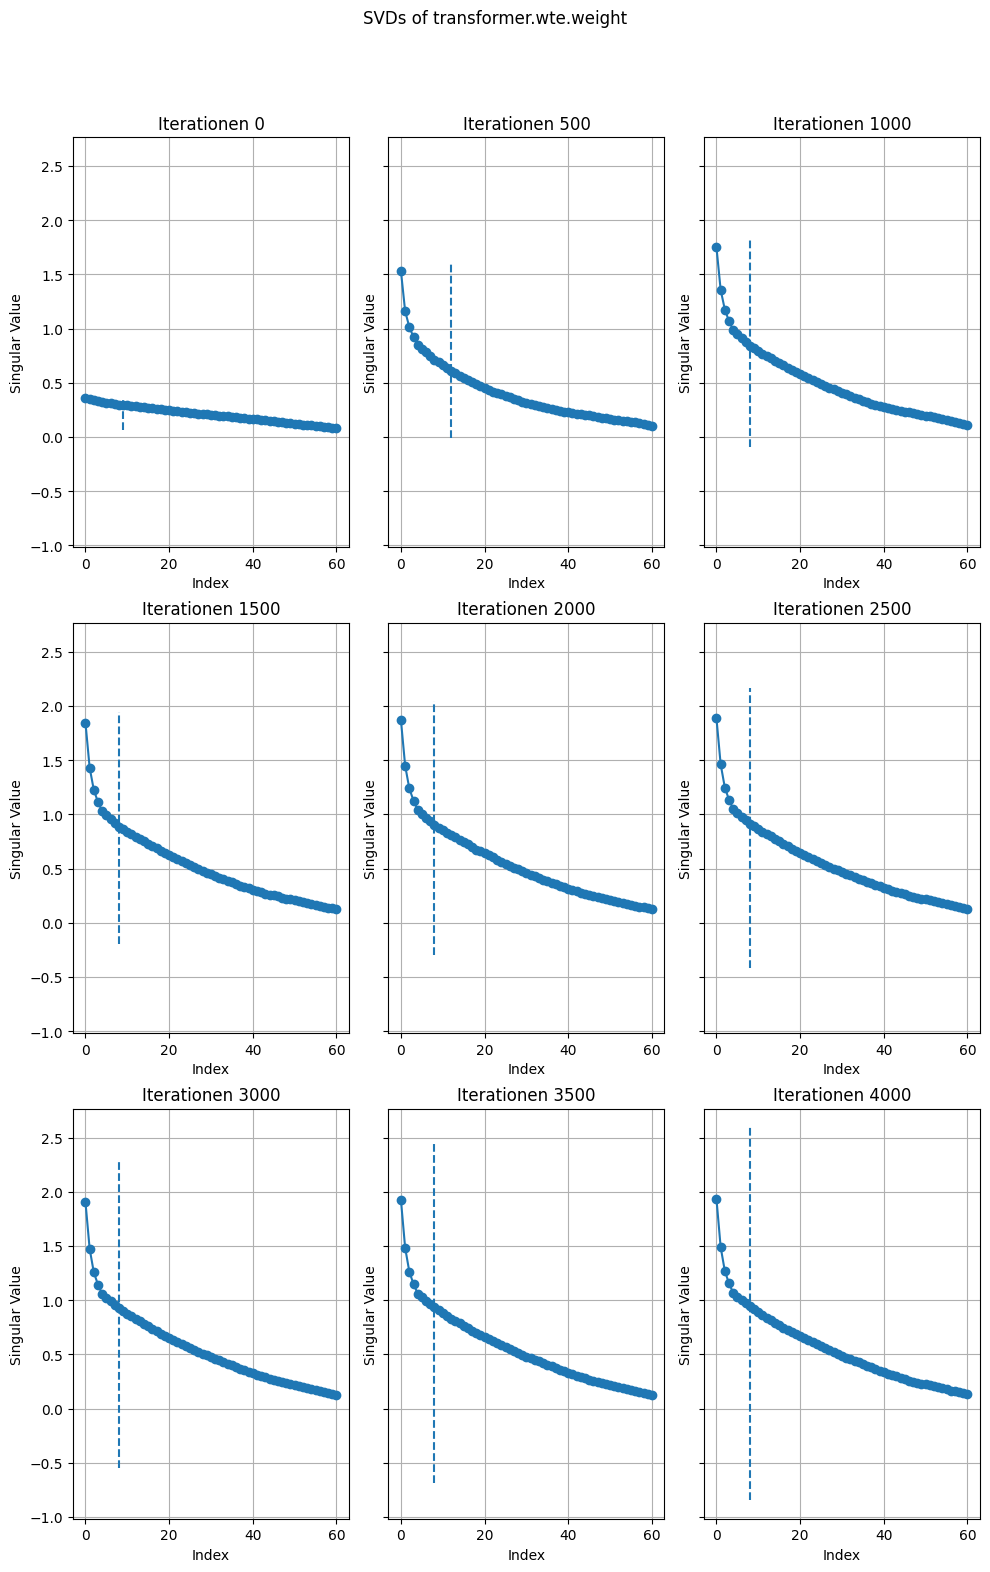

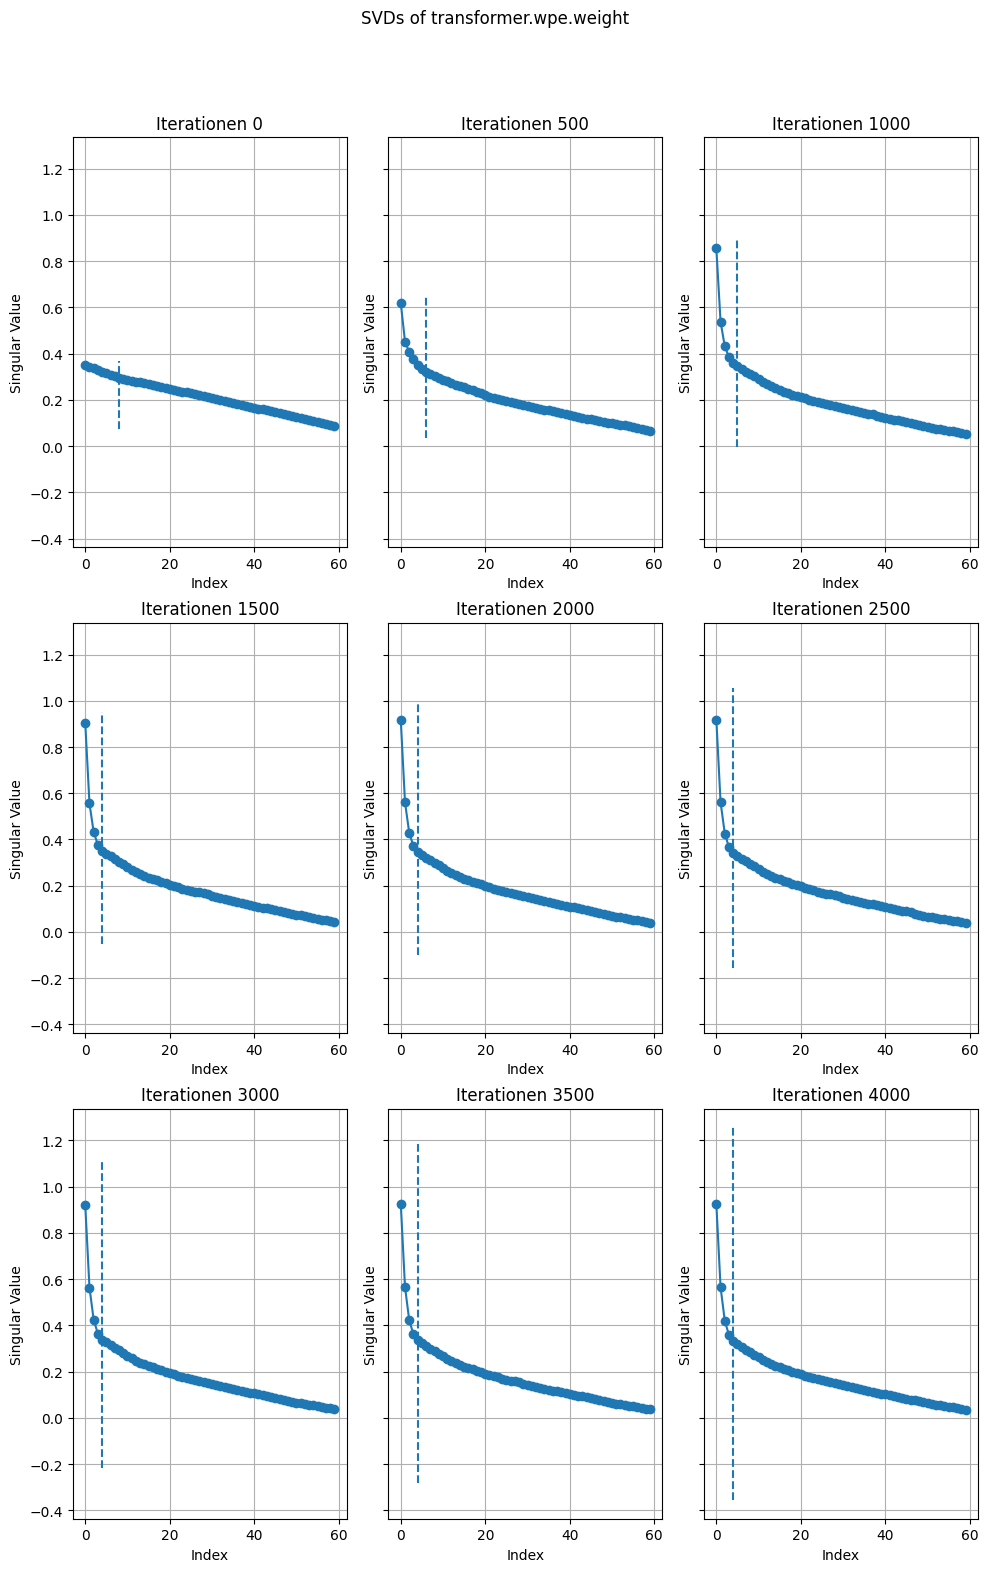

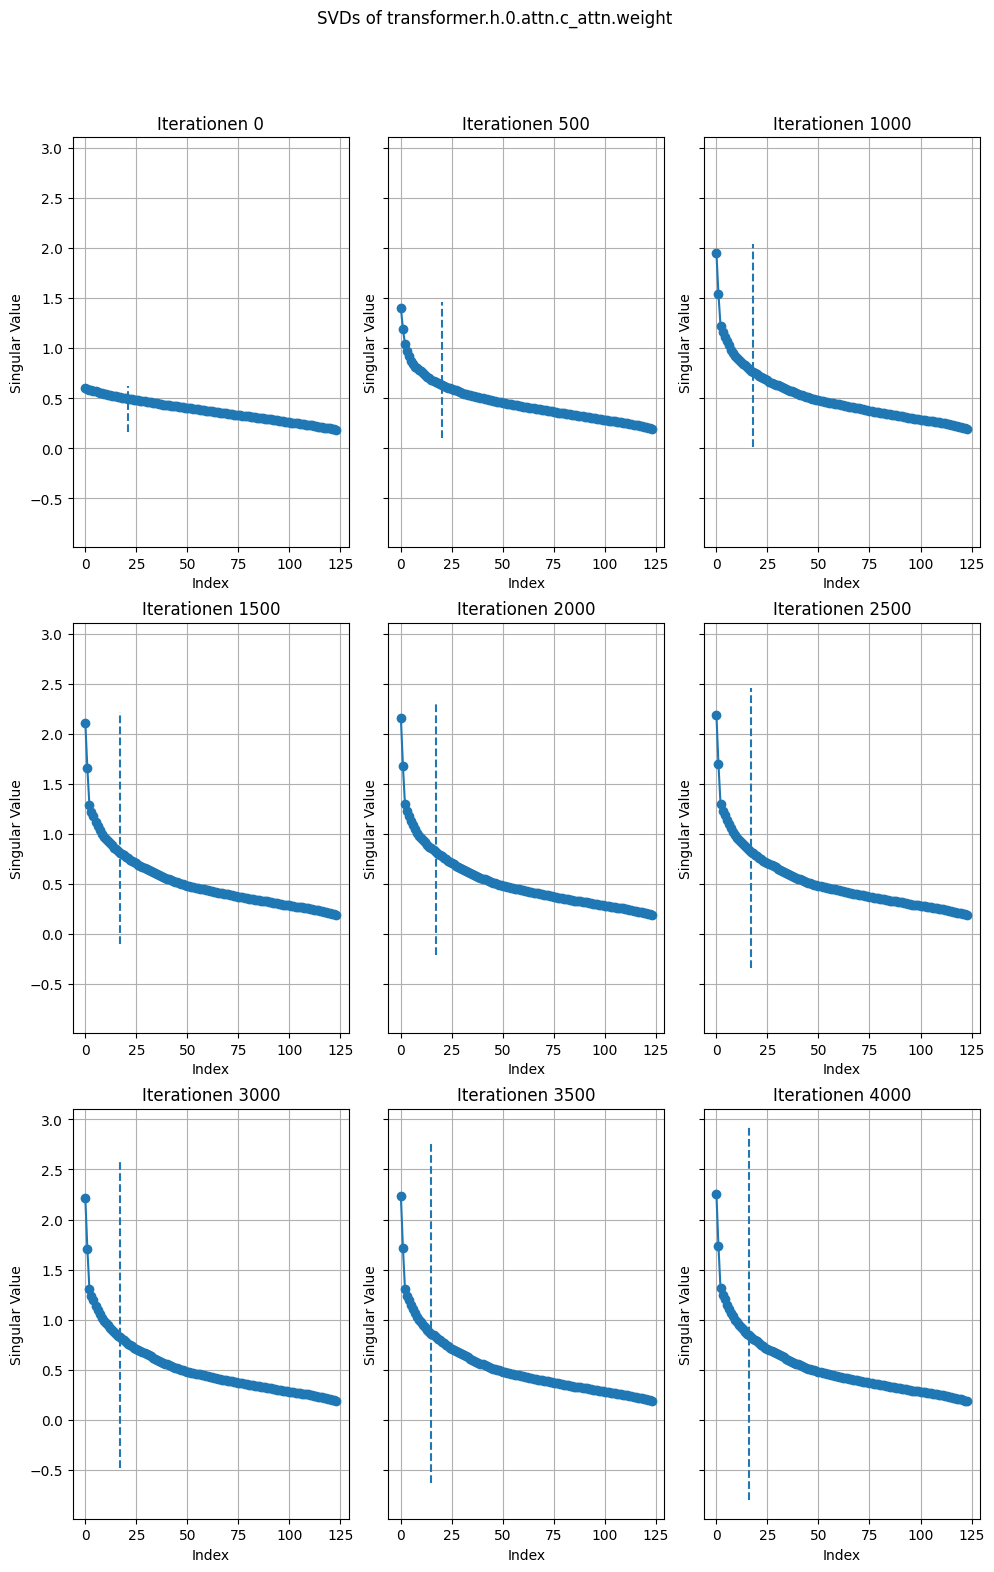

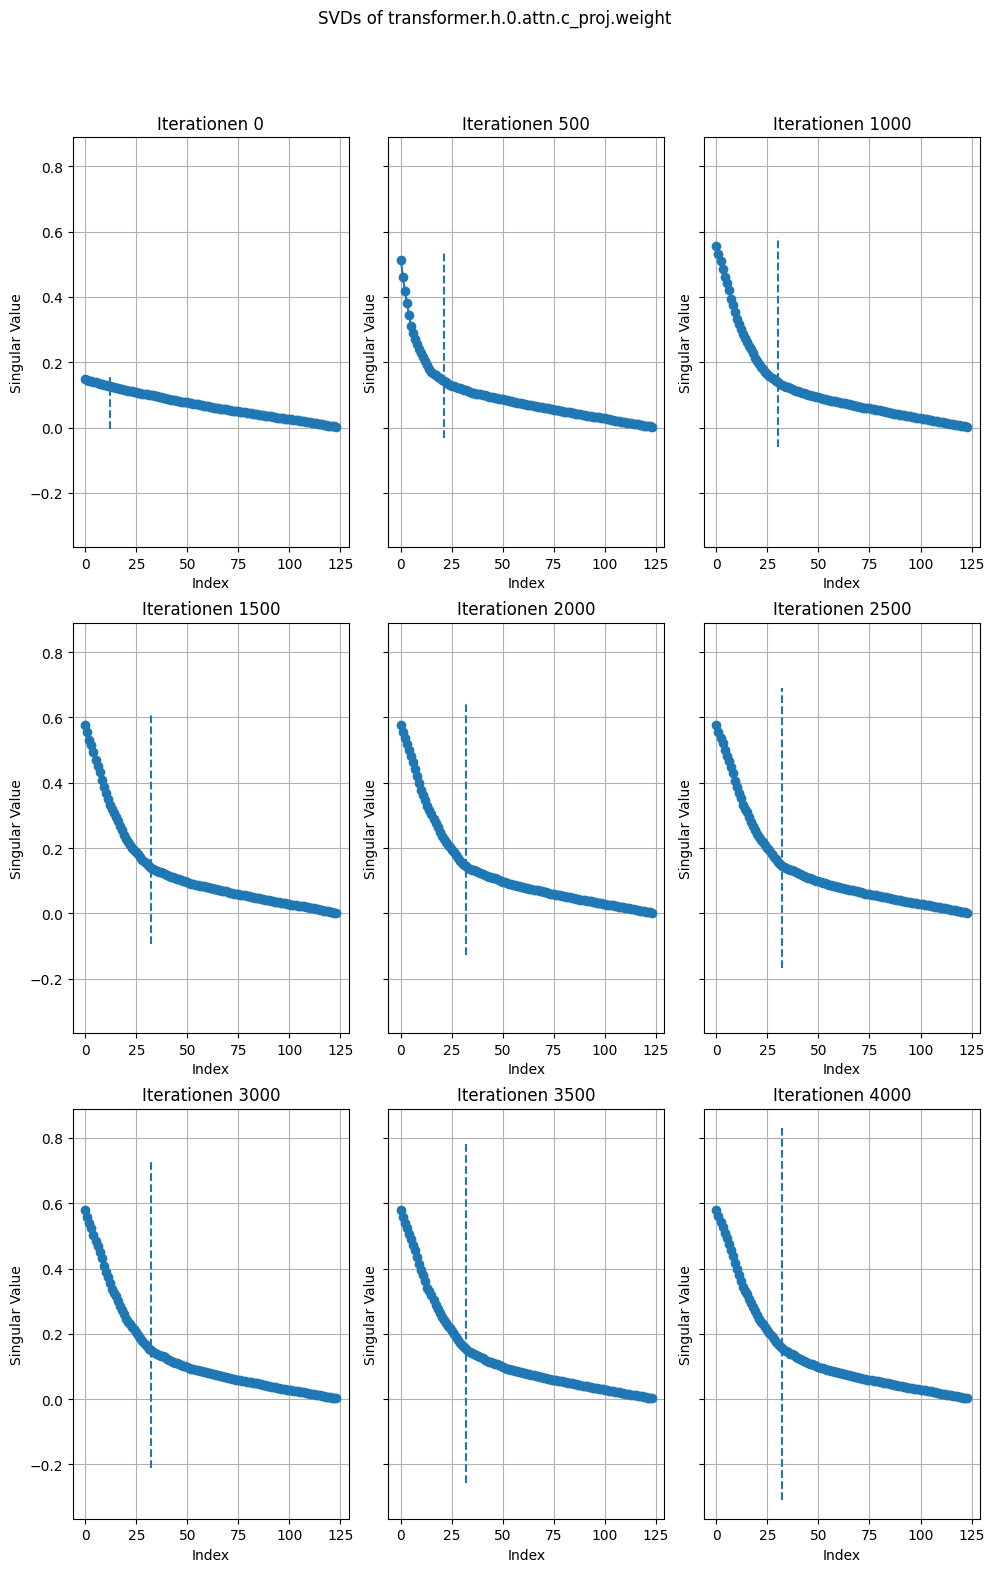

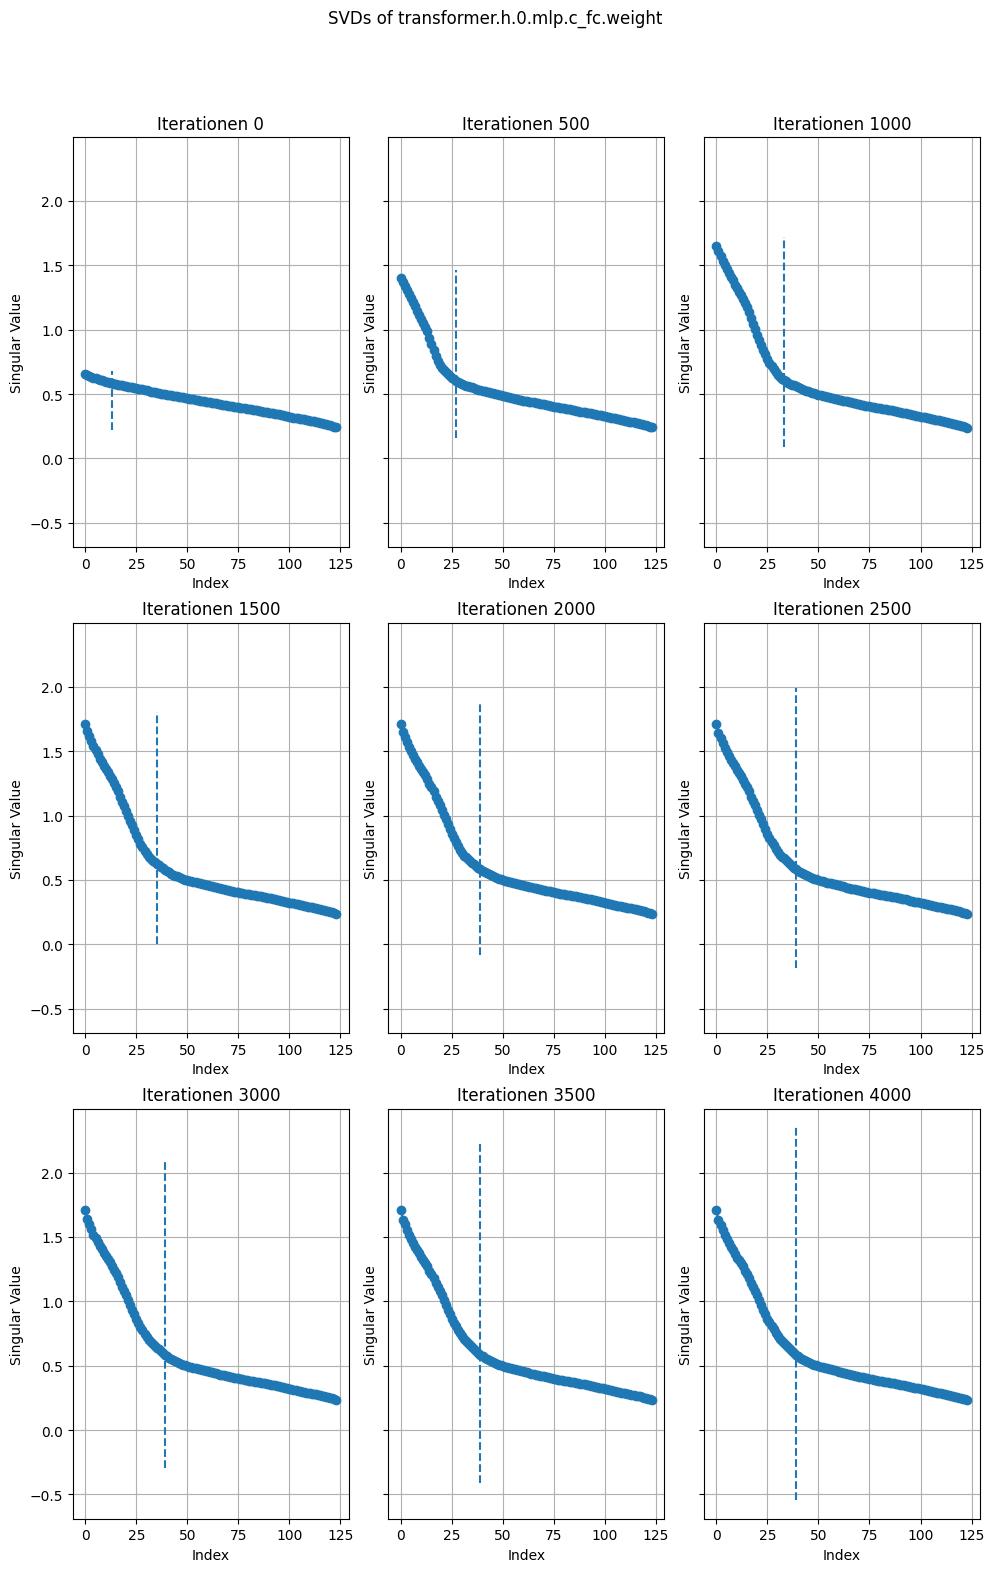

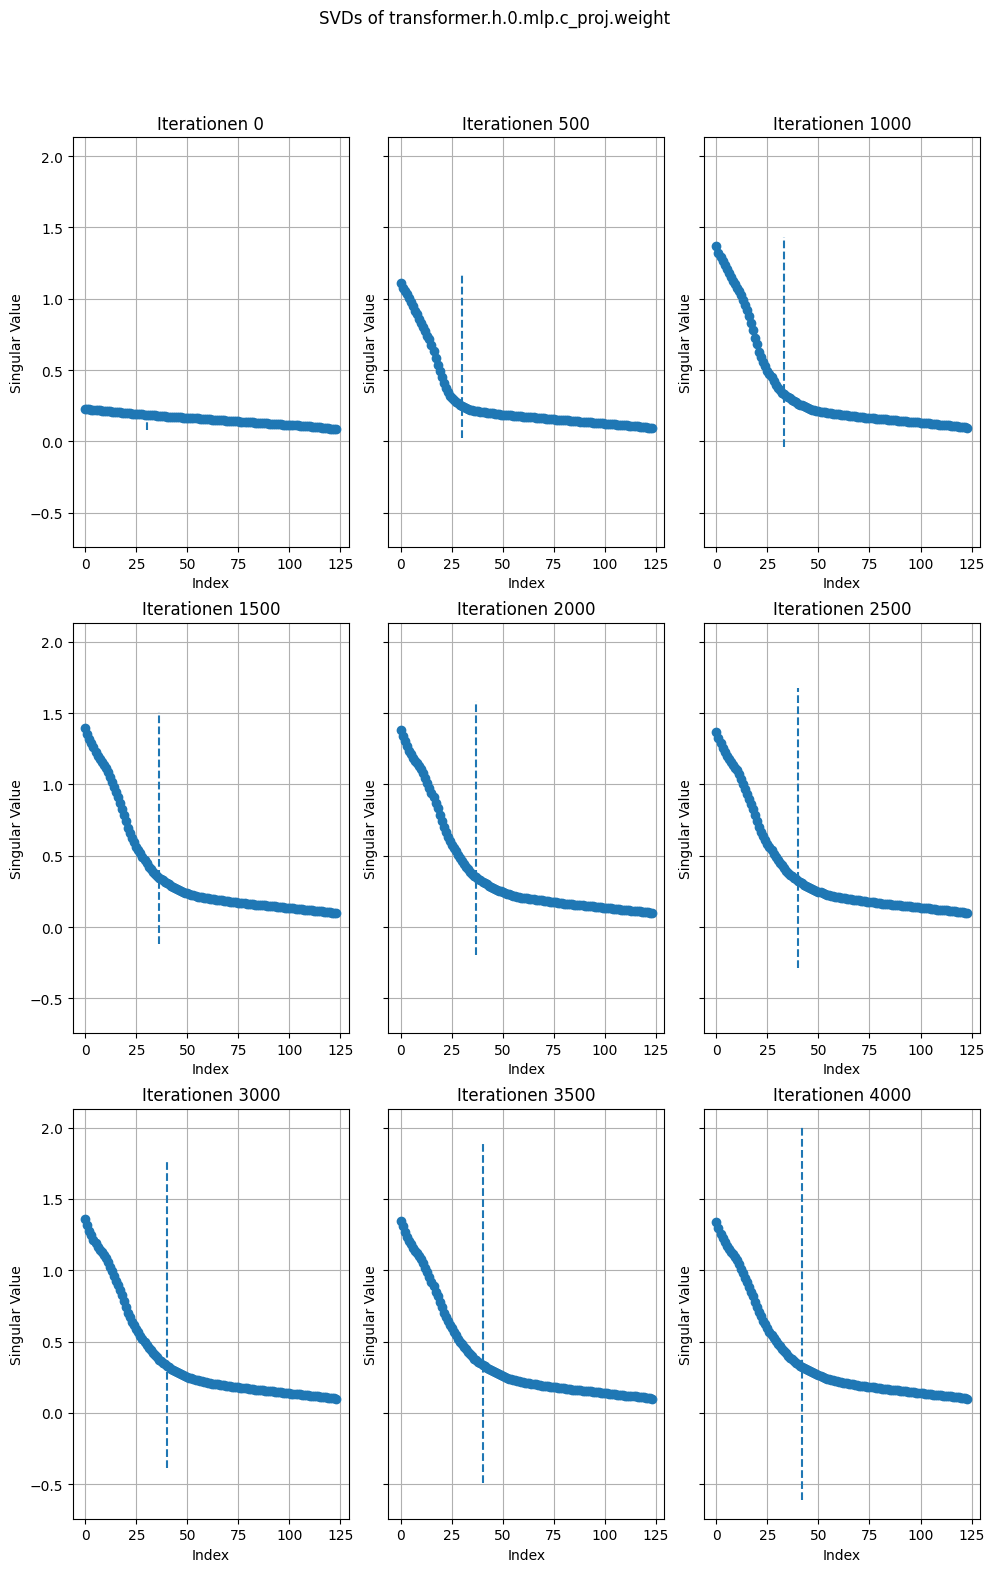

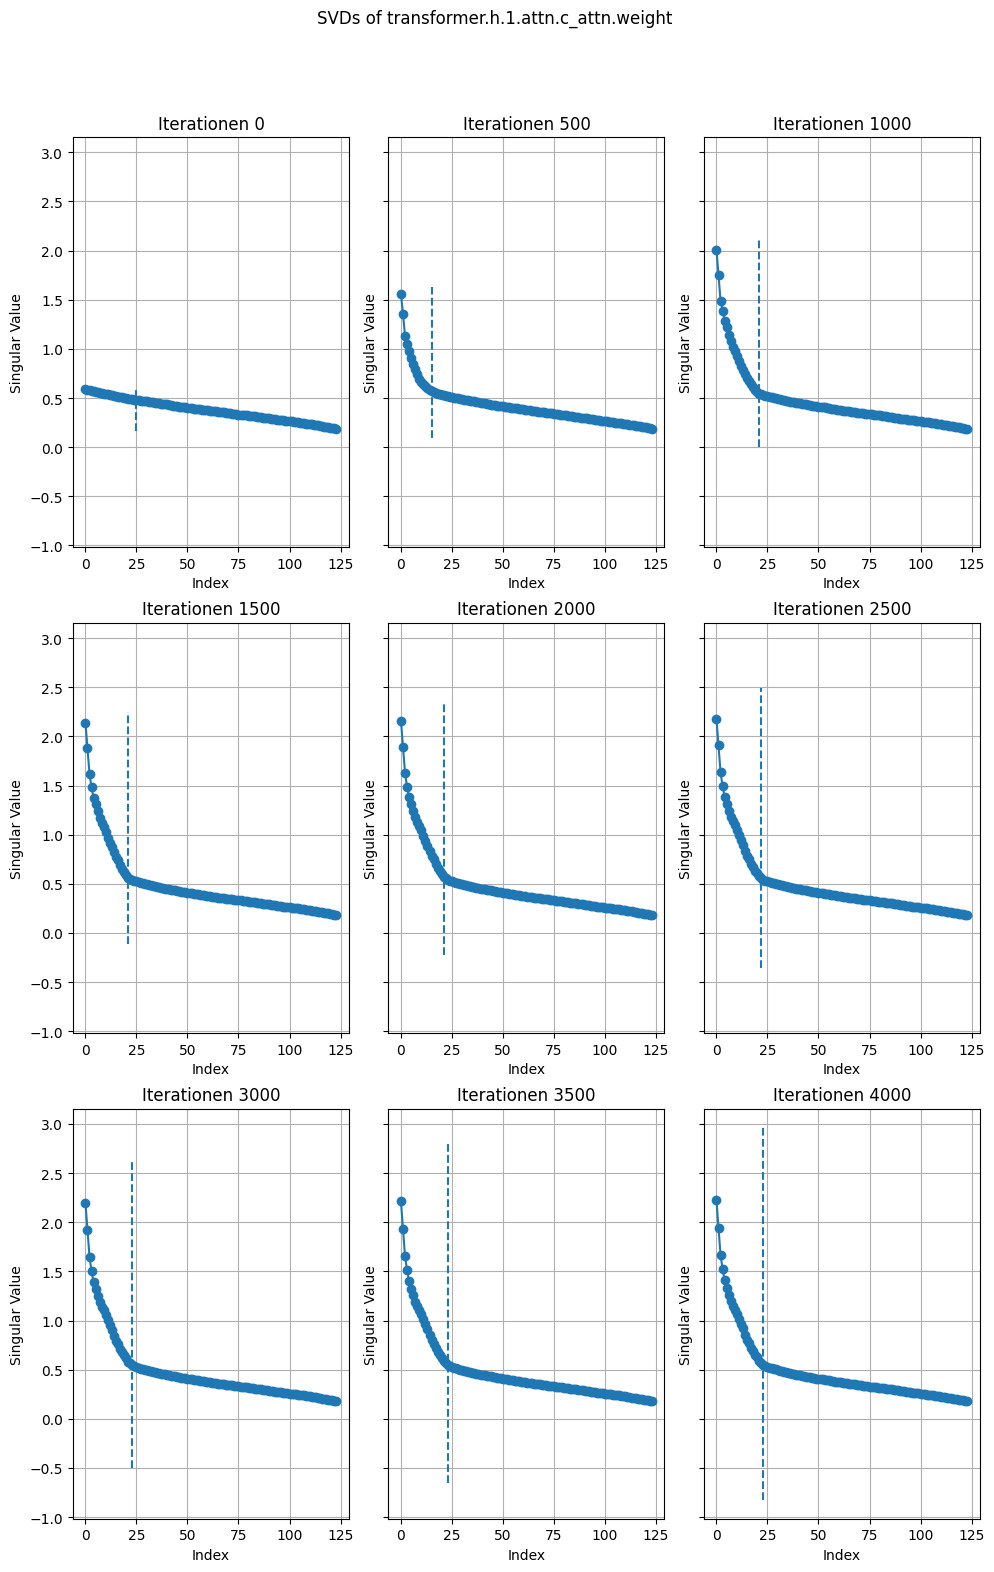

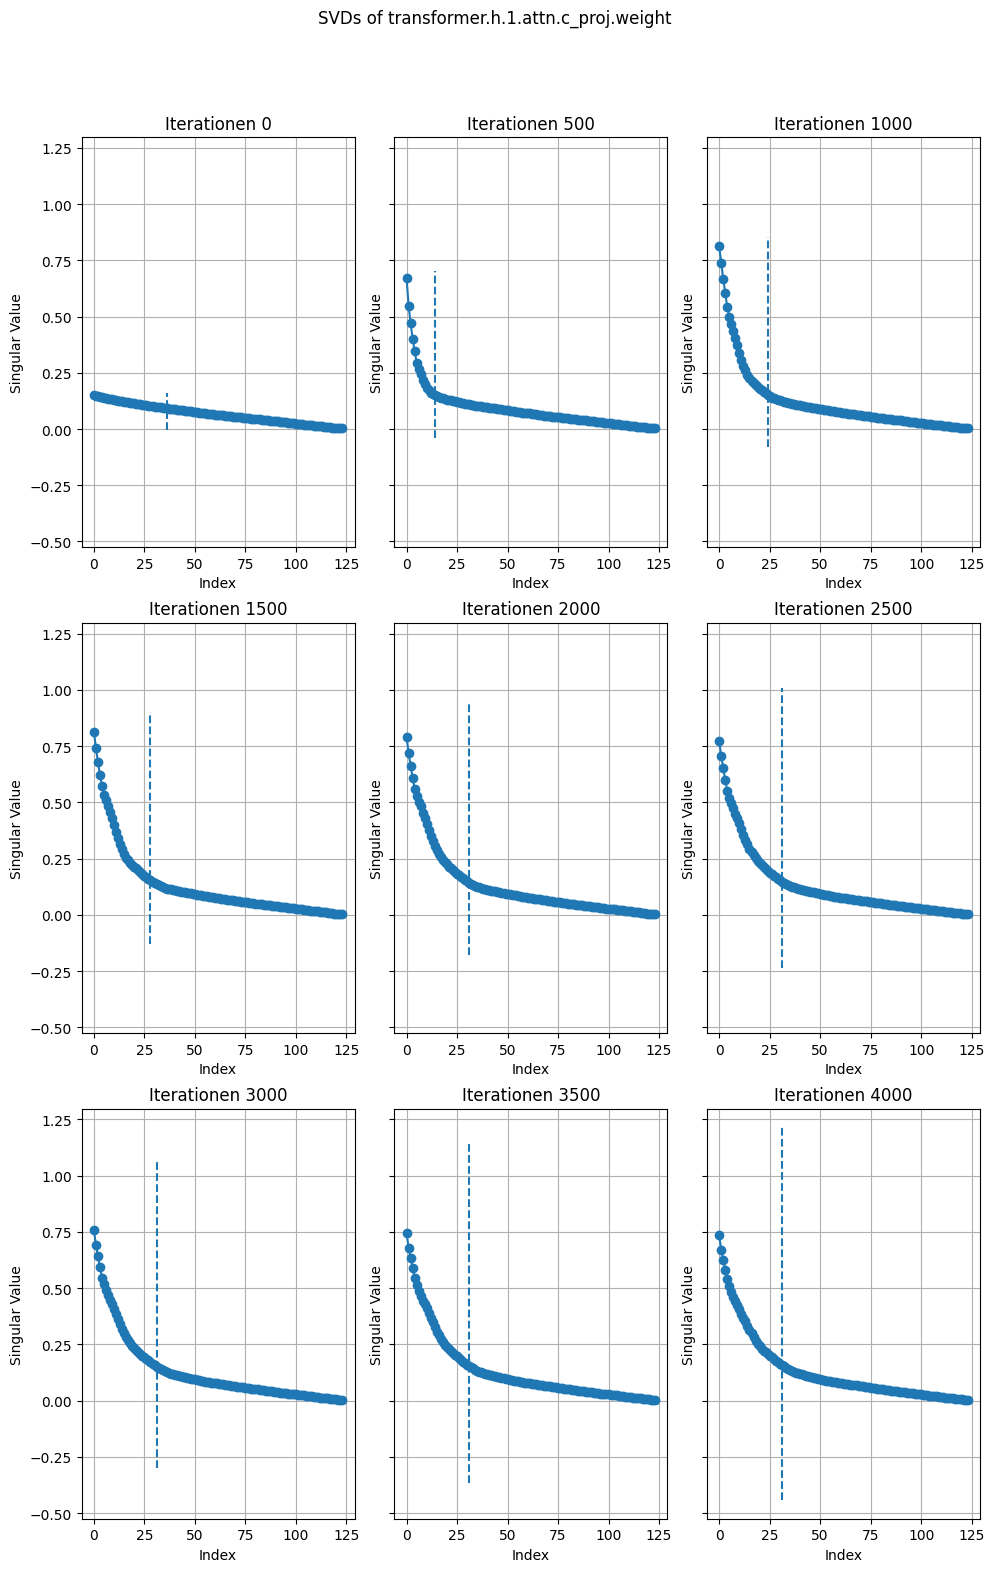

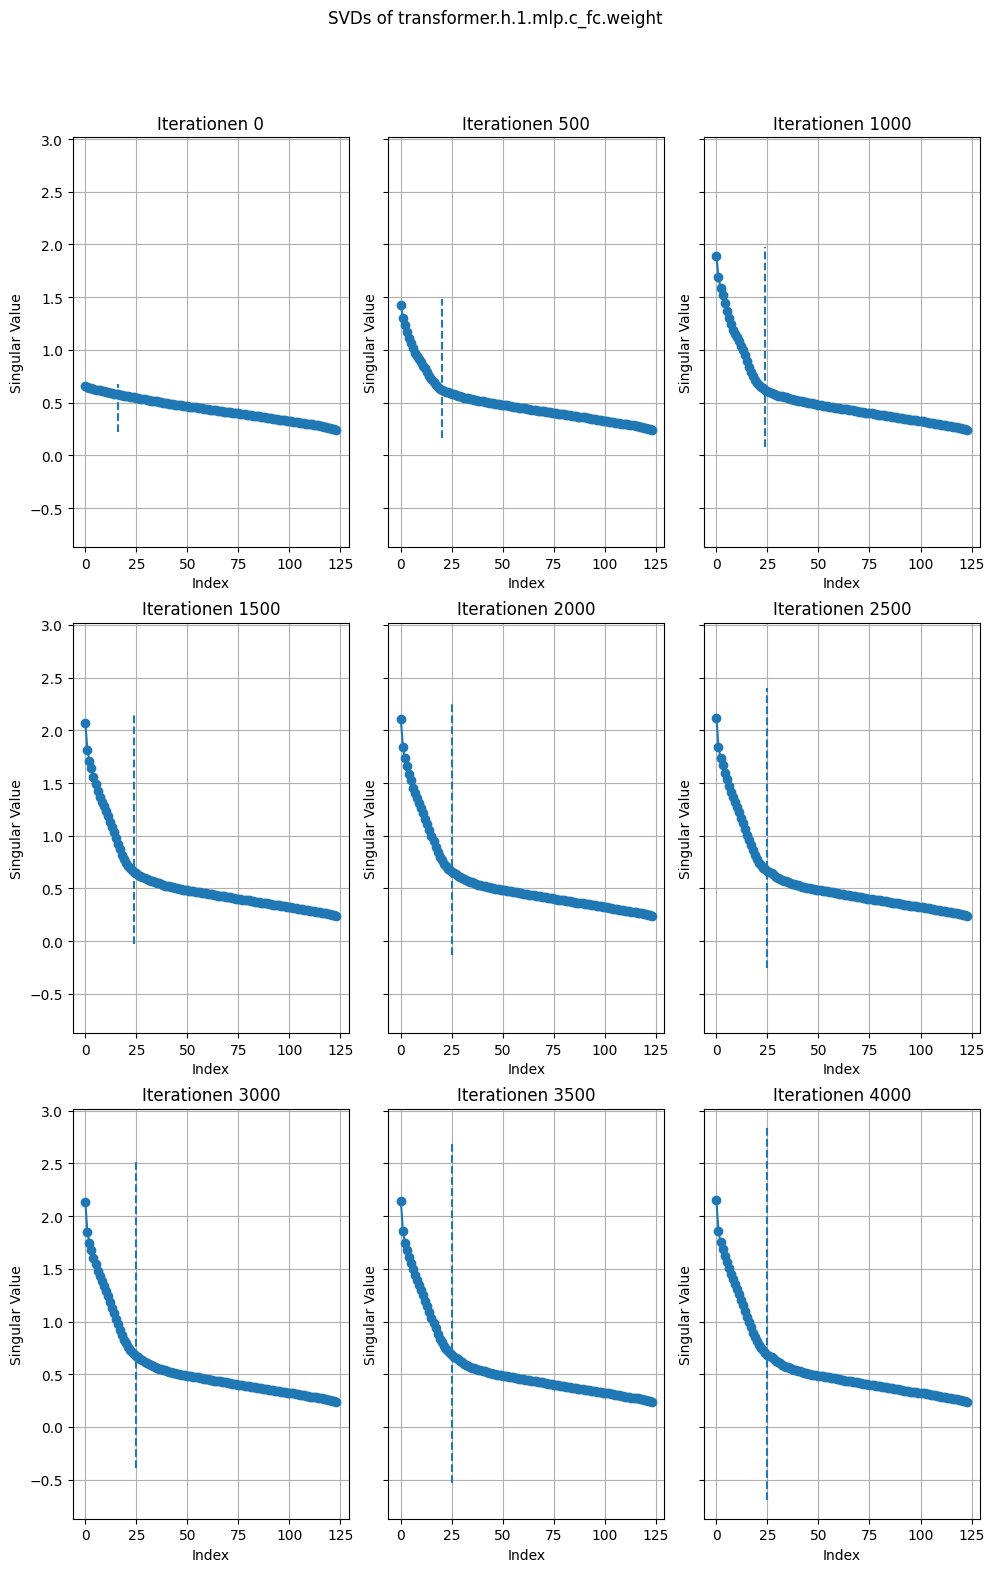

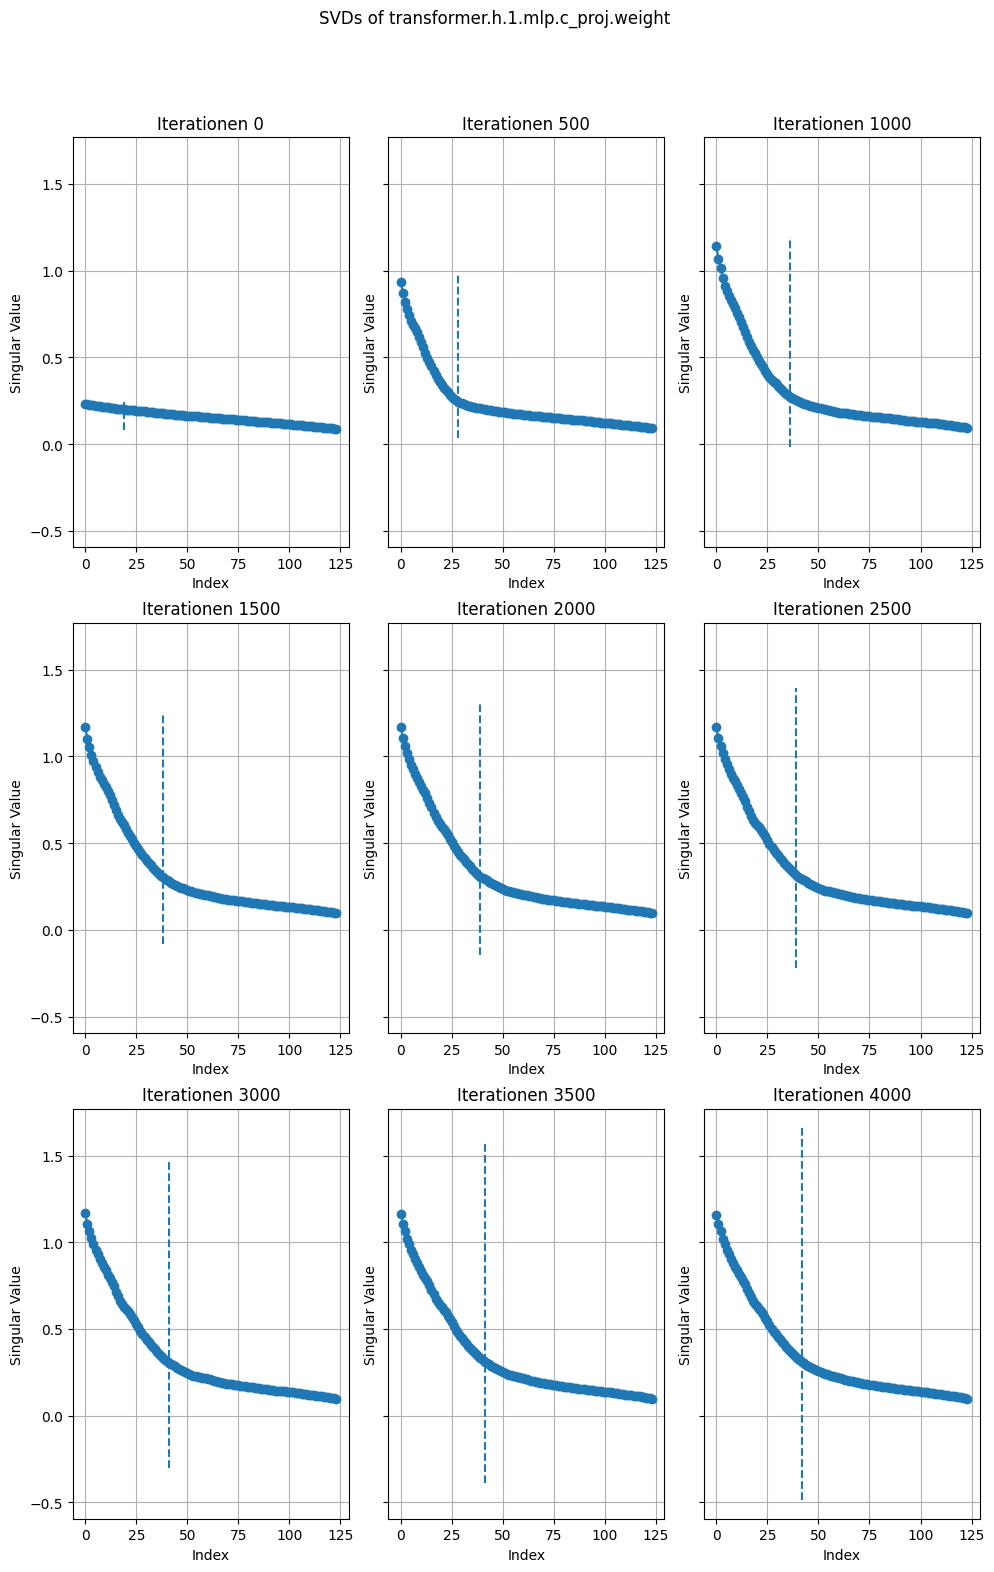

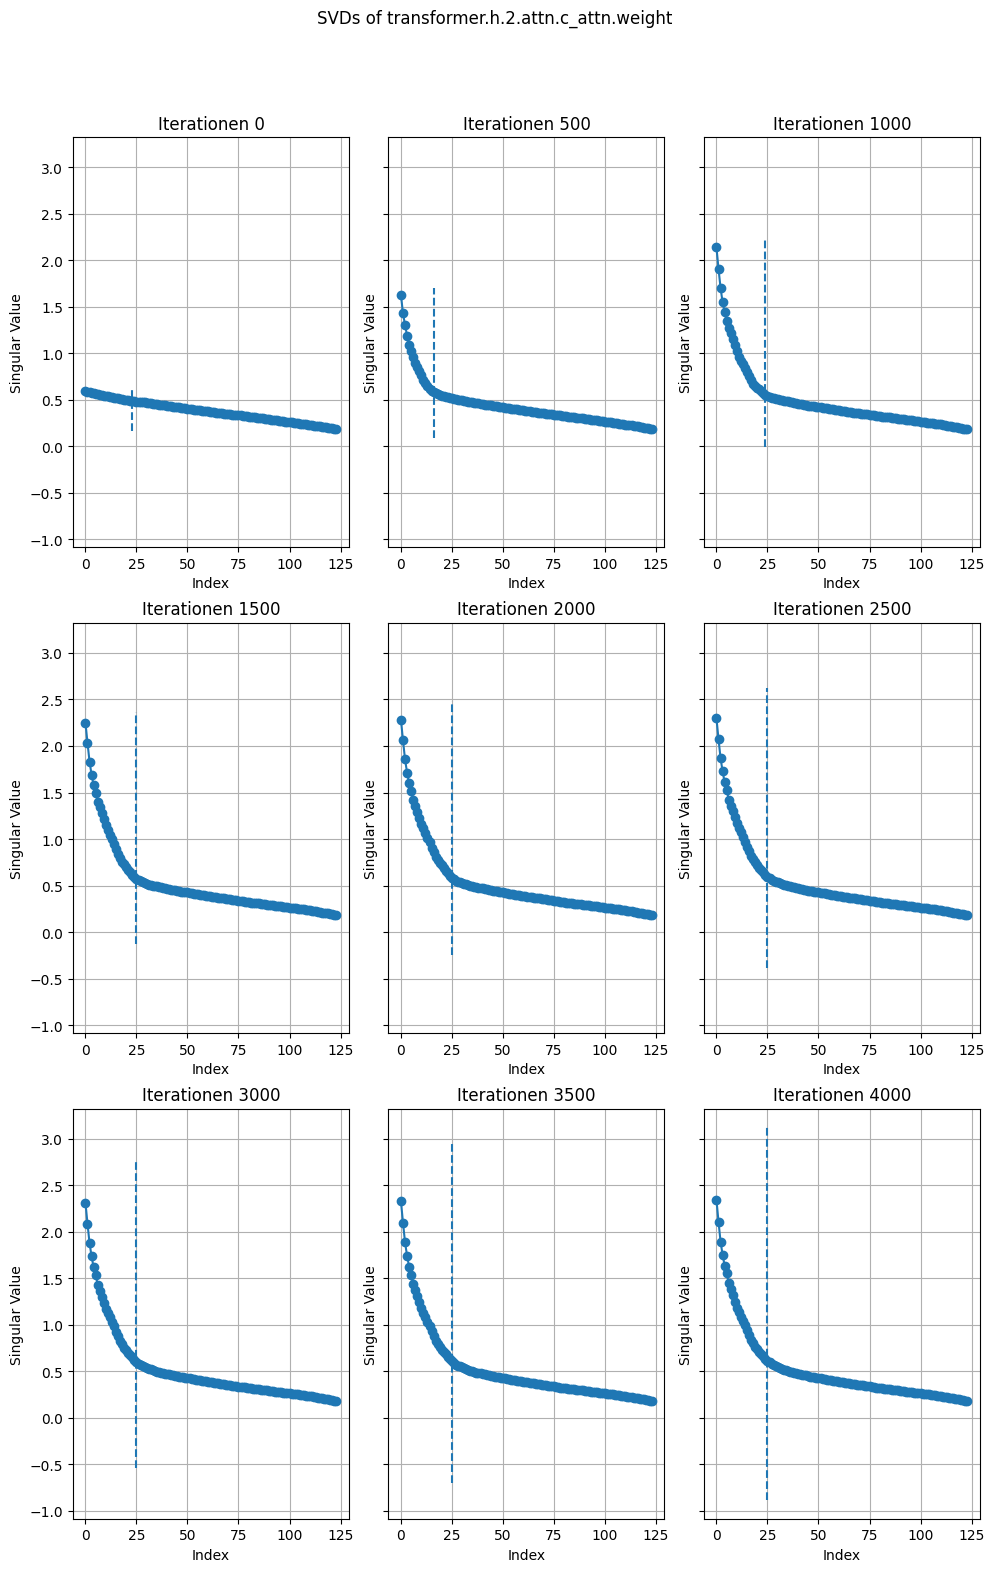

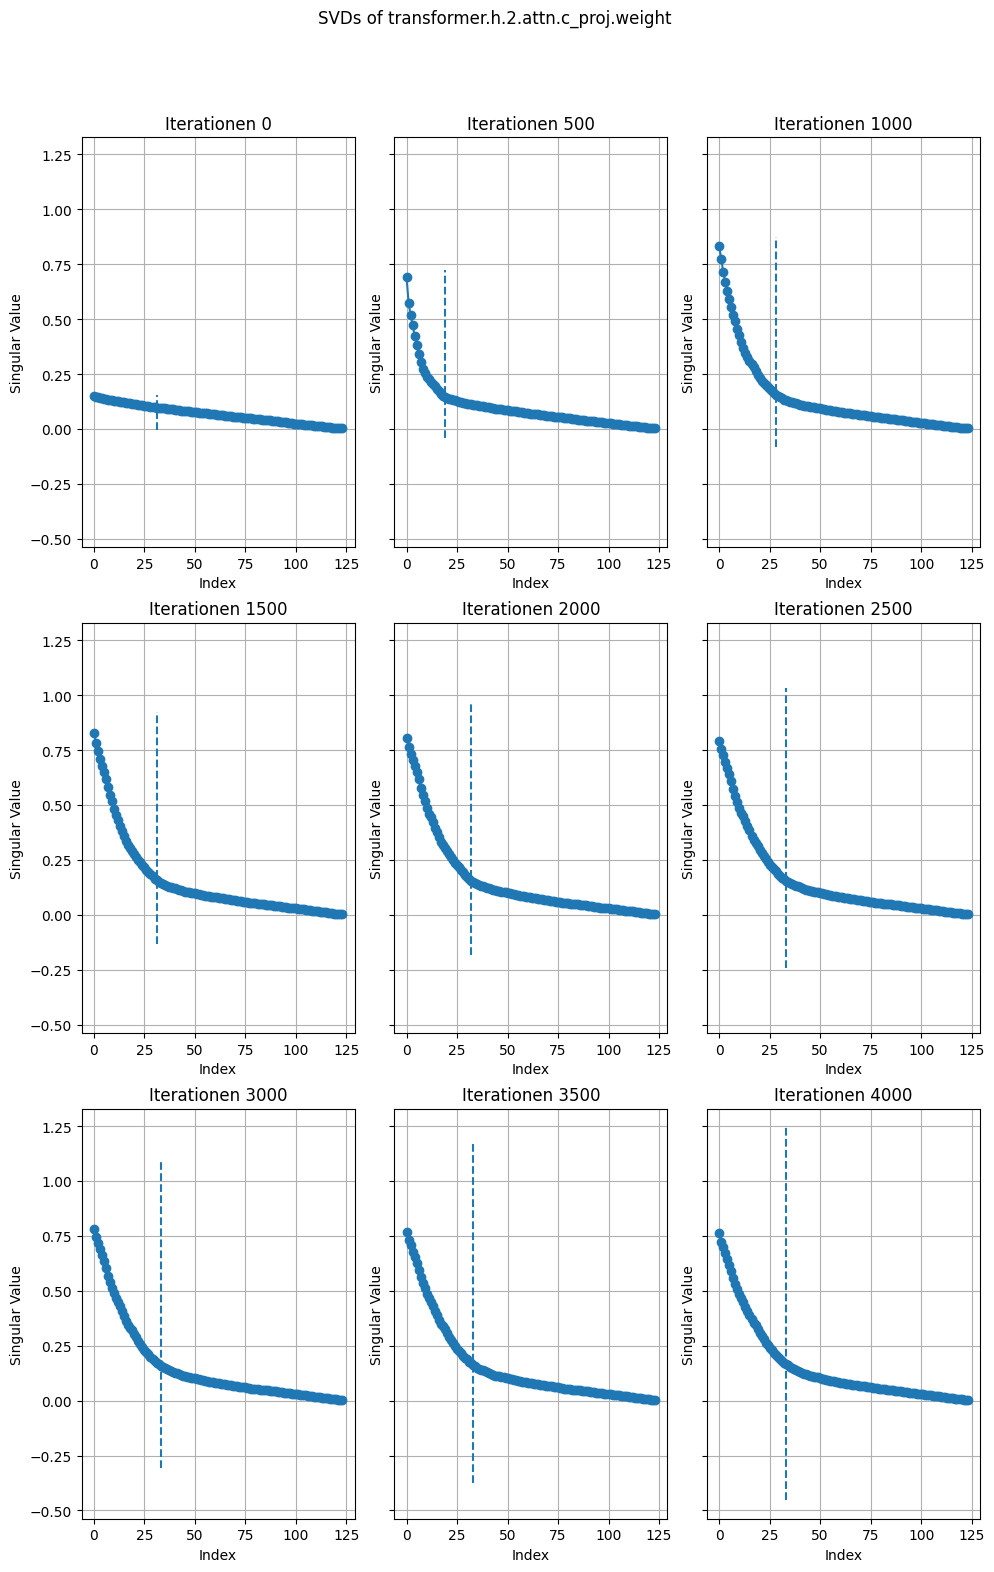

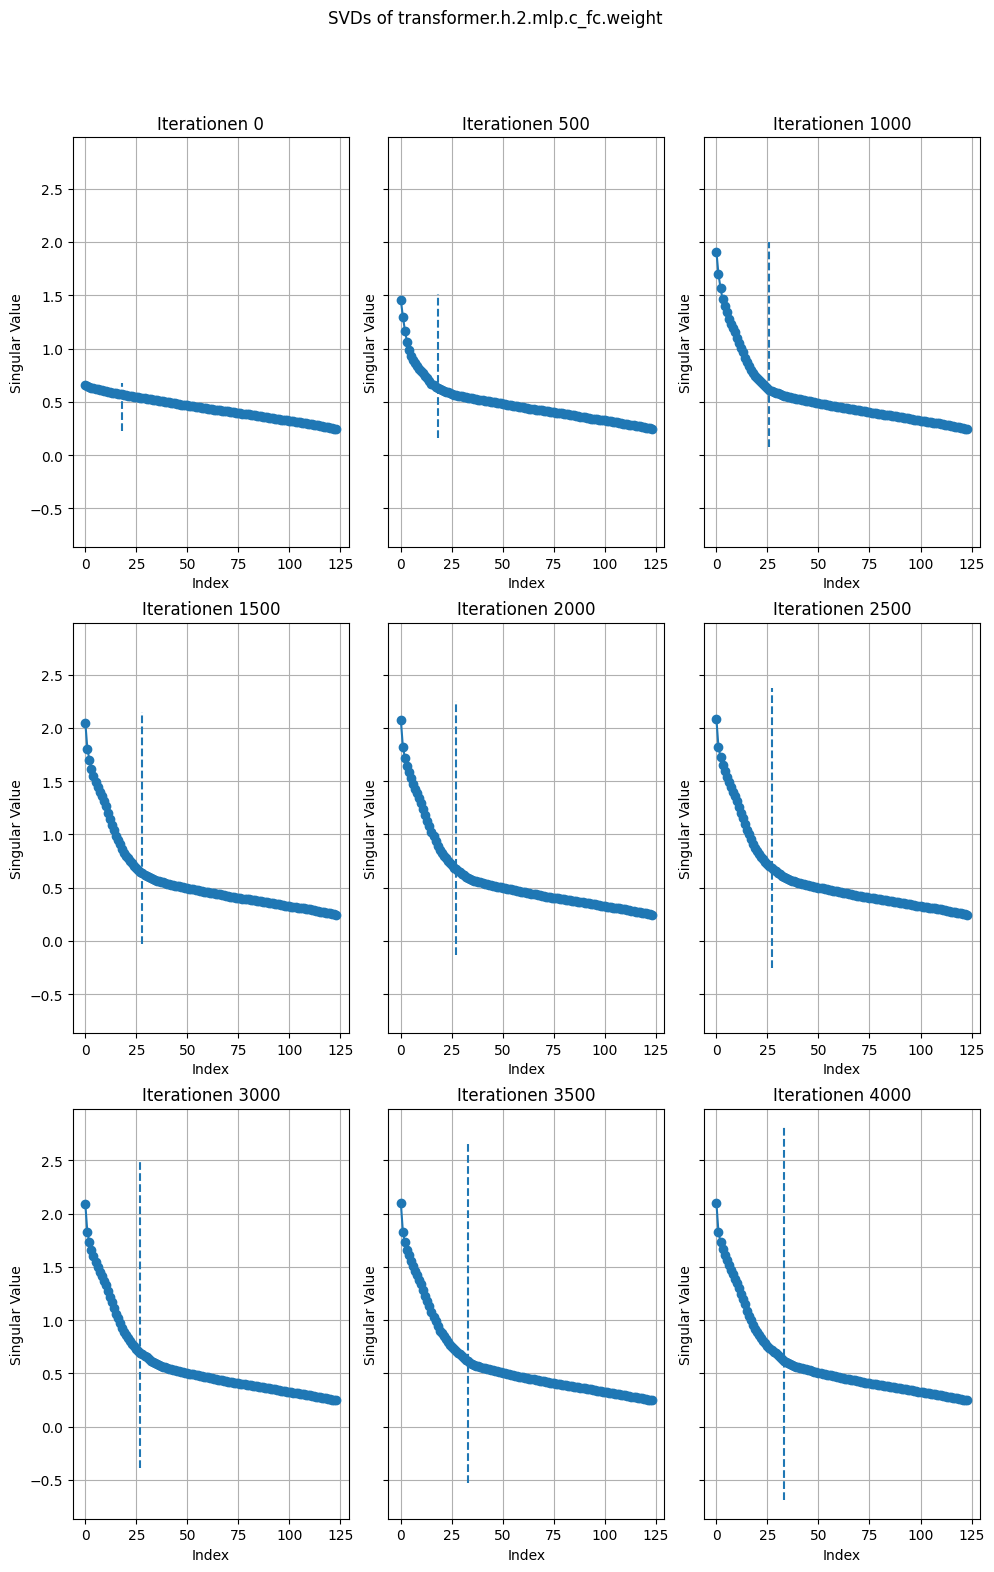

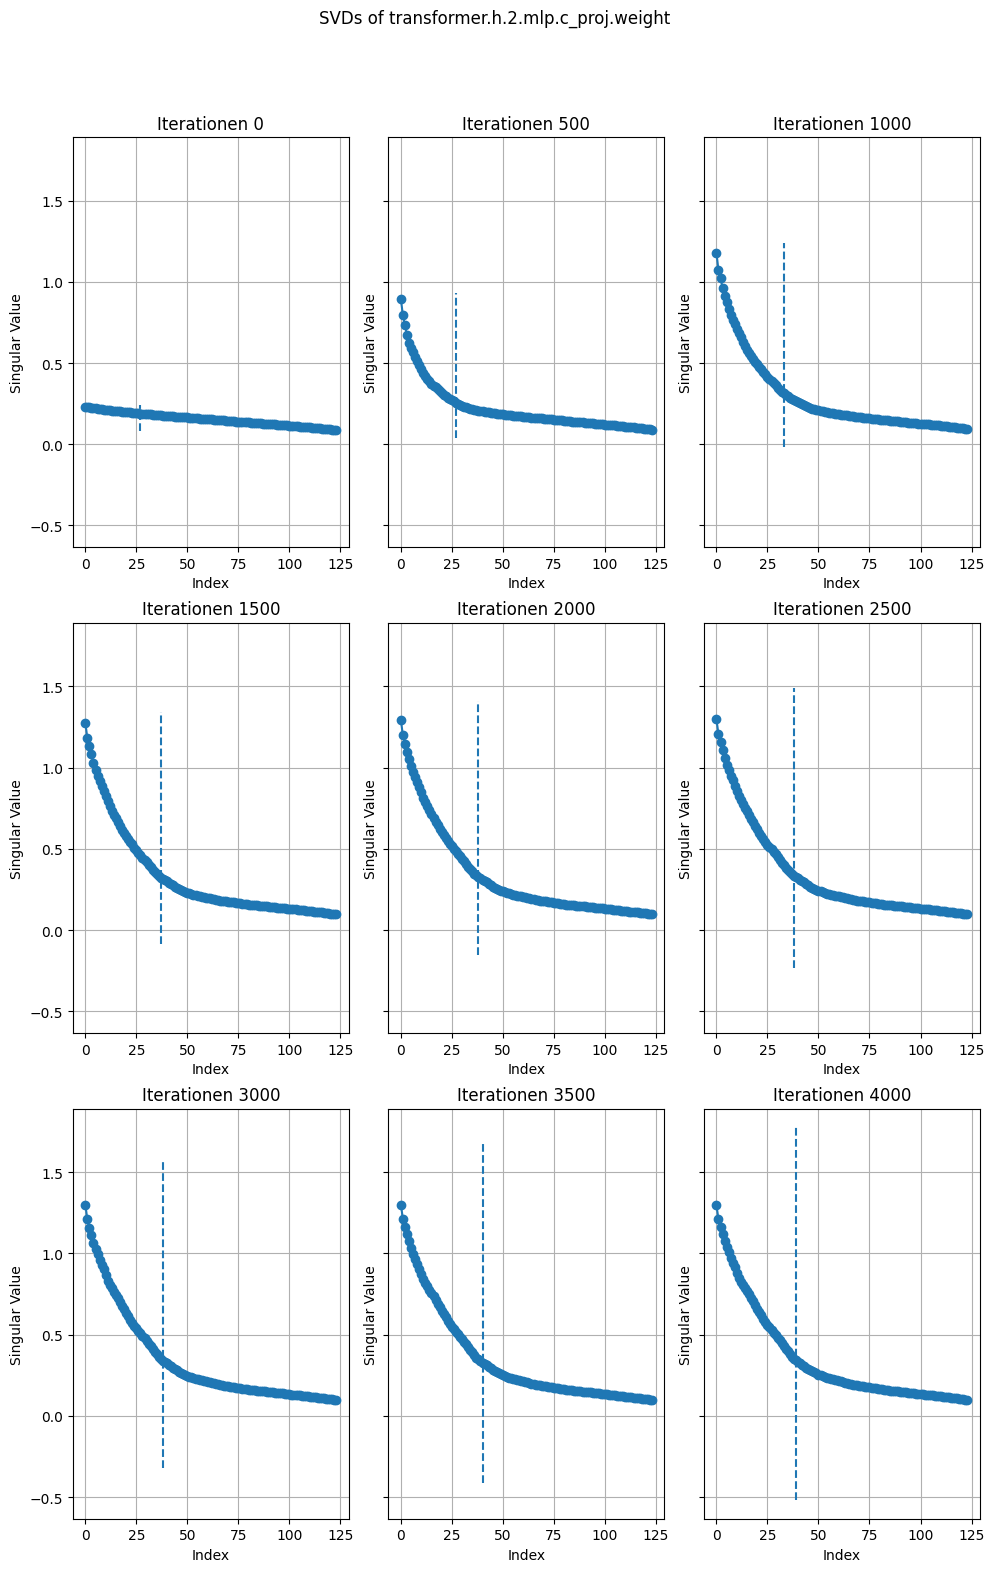

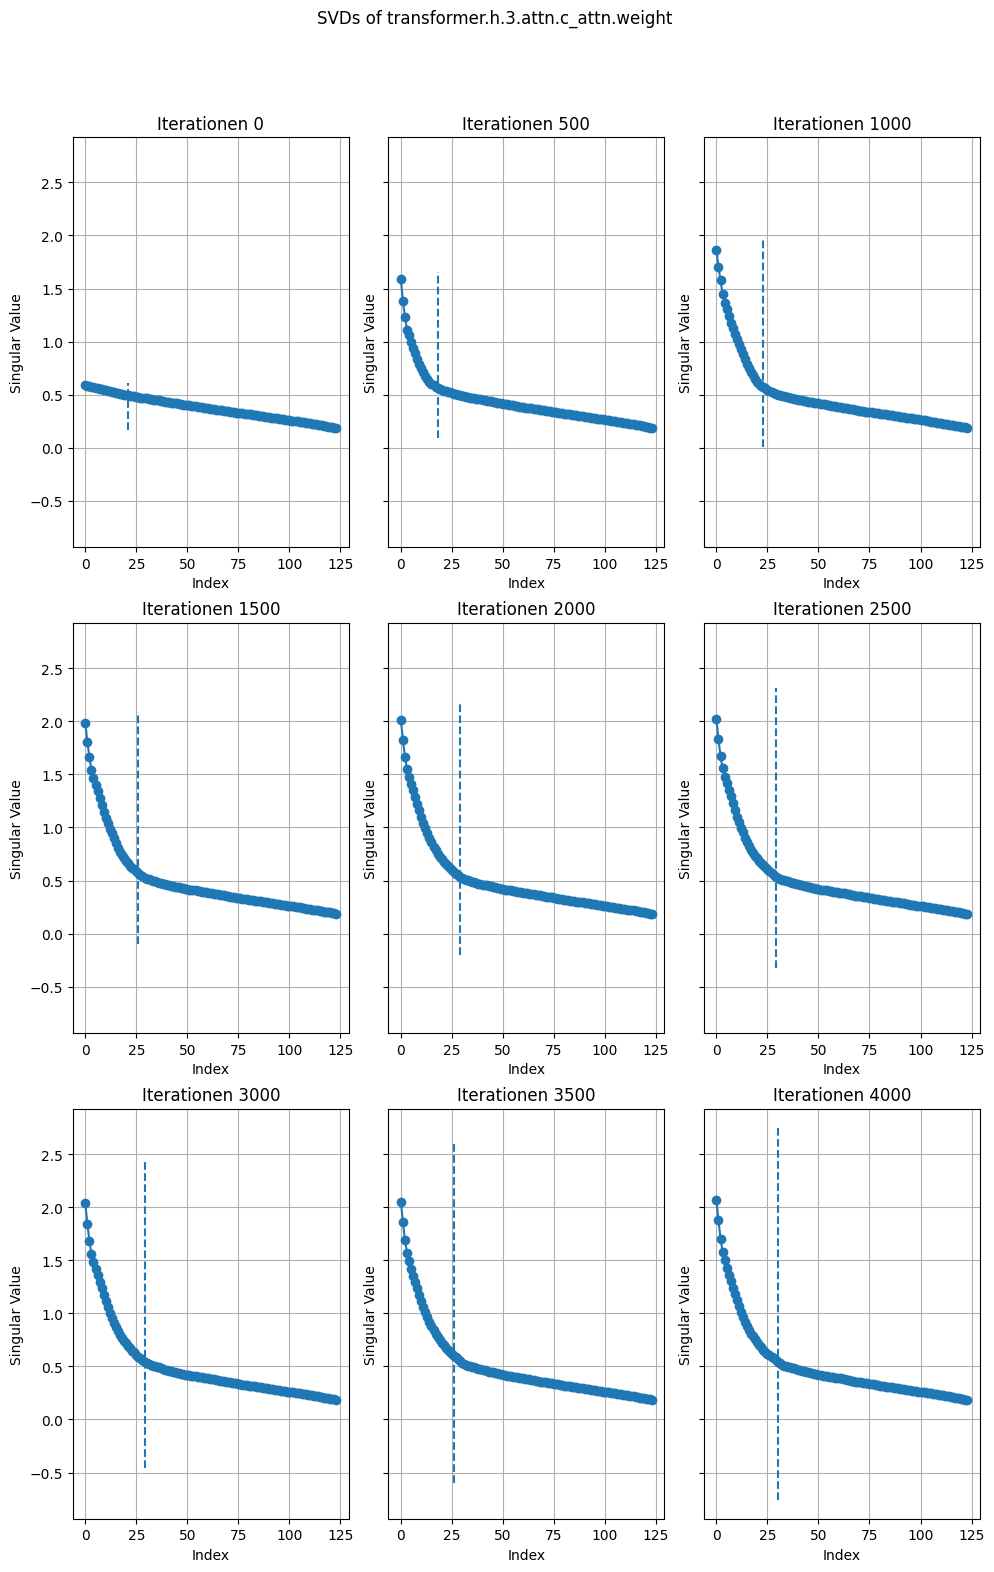

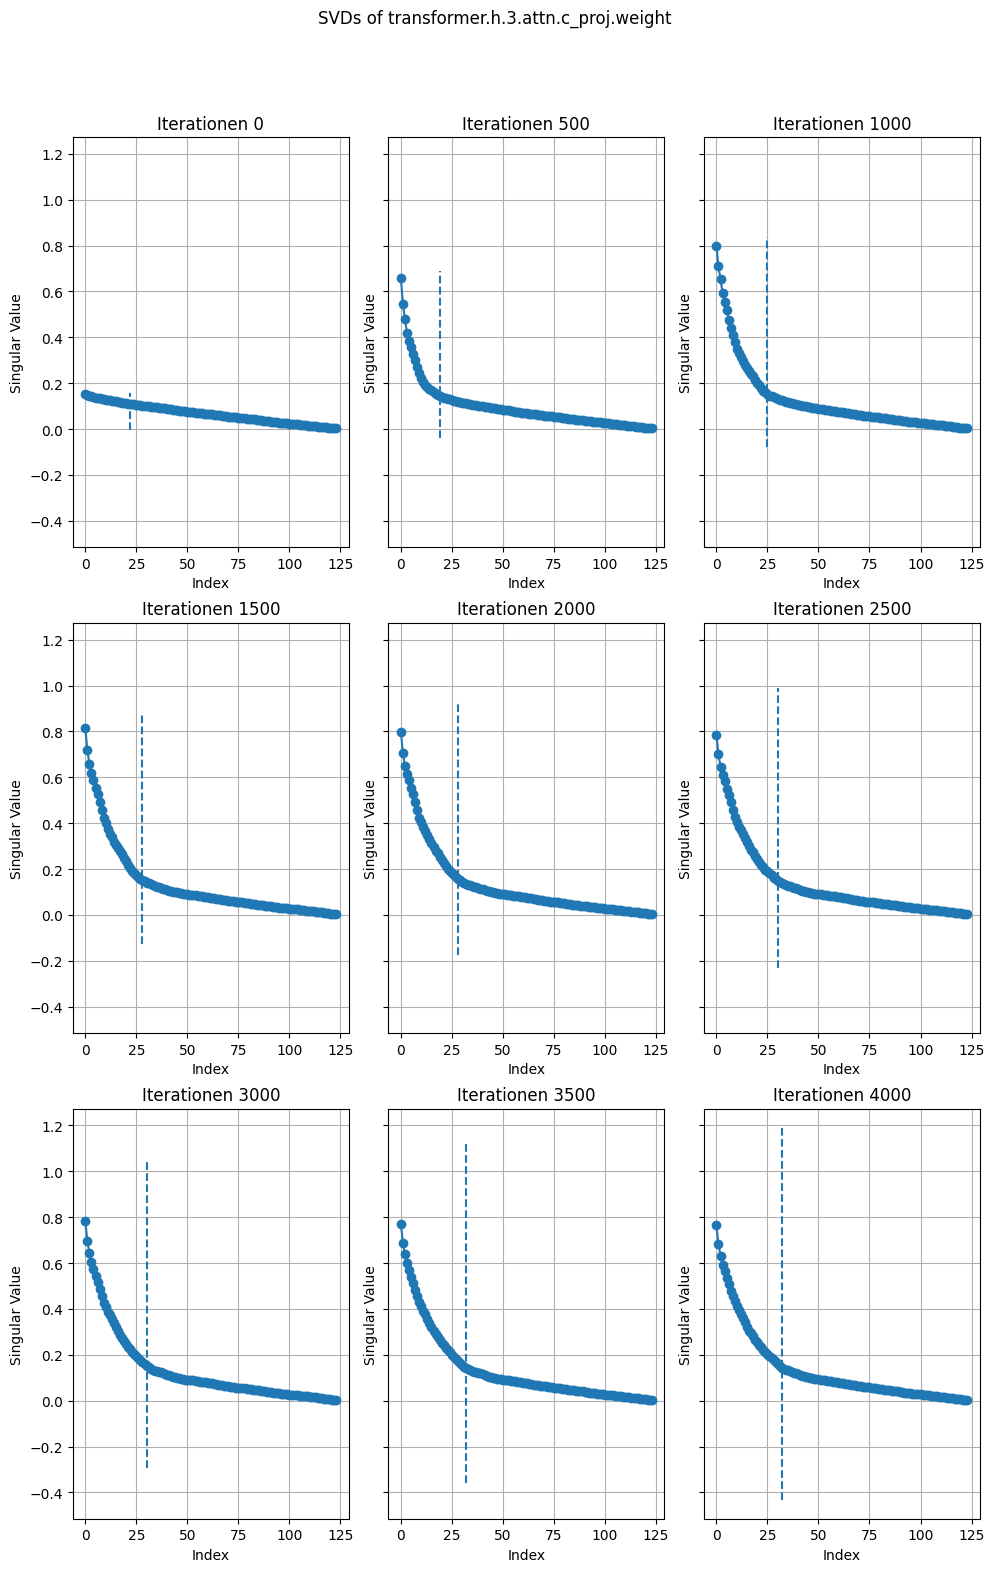

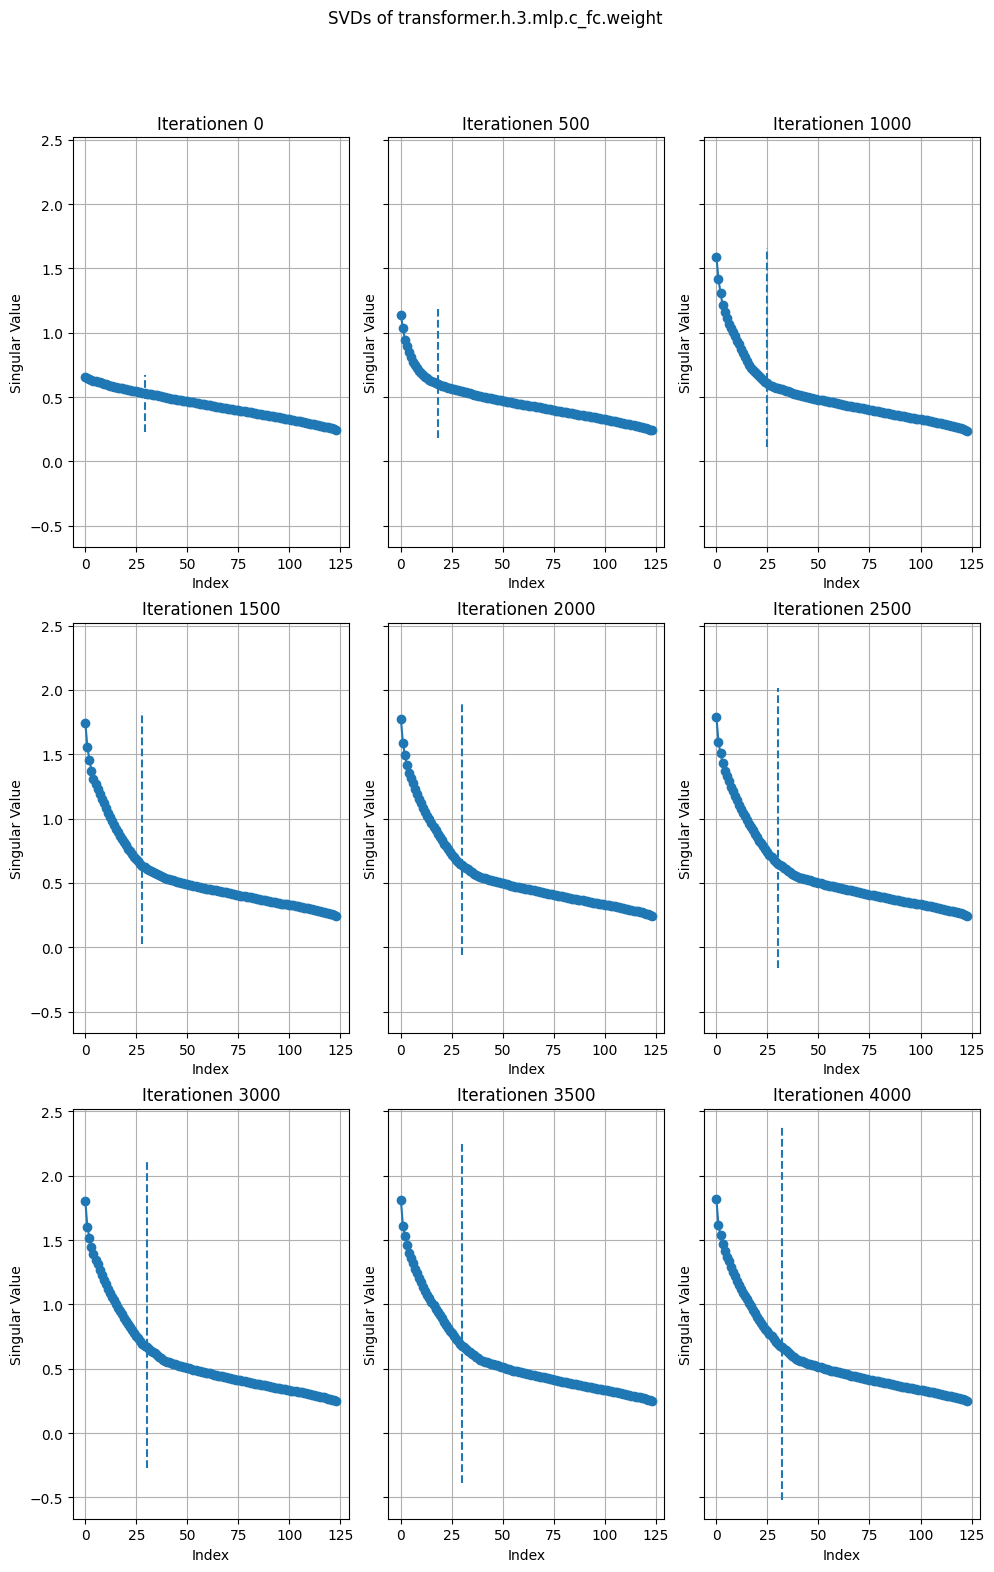

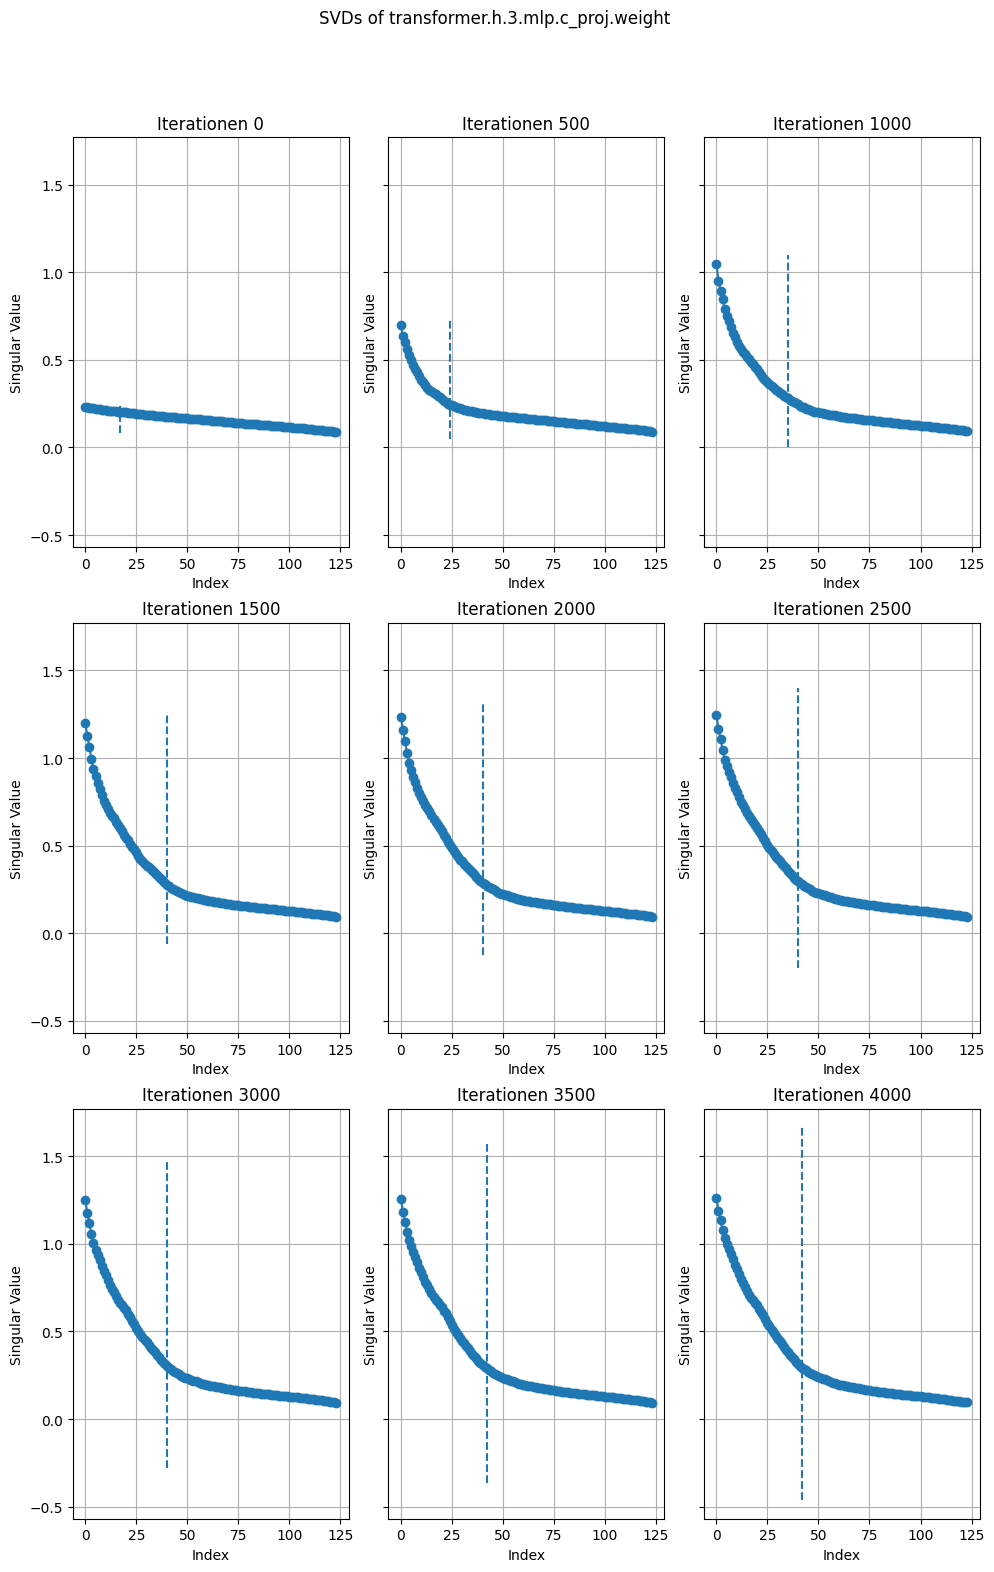

In [10]:
tables = ['transformer.wte.weight',
'transformer.wpe.weight',
'transformer.h.0.attn.c_attn.weight',
'transformer.h.0.attn.c_proj.weight',
'transformer.h.0.mlp.c_fc.weight',
'transformer.h.0.mlp.c_proj.weight',
'transformer.h.1.attn.c_attn.weight',
'transformer.h.1.attn.c_proj.weight',
'transformer.h.1.mlp.c_fc.weight',
'transformer.h.1.mlp.c_proj.weight',
'transformer.h.2.attn.c_attn.weight',
'transformer.h.2.attn.c_proj.weight',
'transformer.h.2.mlp.c_fc.weight',
'transformer.h.2.mlp.c_proj.weight',
'transformer.h.3.attn.c_attn.weight',
'transformer.h.3.attn.c_proj.weight',
'transformer.h.3.mlp.c_fc.weight',
'transformer.h.3.mlp.c_proj.weight',
]
for name in tables:
    print_svd(name, 9)